In [1]:
import cartopy.crs as ccrs
import iris
#import iris.quickplot as qplt
import iris.plot as iplt
import xarray as xr
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
import datetime as dt
from scipy.special import gamma
from scipy.integrate import simpson
from scipy.integrate import trapezoid

In [2]:
# Calculate model PDF - CLOUD

mu = 2.5

rho_air = 1.293 #take from model (kg/m3)
rho_water = 1000. #(kg/m3)
a = (np.pi/6.)*rho_water
b = 3

n_m3 =154.6*1e6 #kg-1
m_m3 =0.00024 #kg kg-1
moment_0 = n_m3
moment_3 = m_m3/a
# mphys_parameters.f90
p3 = 3.0 # line 332
p0= 0.0 # line 333
# line 319 - 360 - initialise.f90
gam_1_mu_p3 = gamma(1.0+mu+p3) 
gam_1_mu_p0 = gamma(1.0+mu+p0) 
inv_p3_p0 = (1.0)/(p3 - p0) 

lam=((gam_1_mu_p3/gam_1_mu_p0)*(moment_0/moment_3))**(inv_p3_p0) # line 471 lookup.f90 - get_lam_n0_2M

n0 = moment_0*((lam**(1+mu)) / gamma(1+mu)) # Field et al 2023 
cpd_bins = np.array([ 2., 3.,  4.,  5.,  6.,  7.,  8., 9., 10., 11., 12., 13., 14., 16., 18., 20., 22., 24., 26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.,52.,54.,56.,58.,60.,65.,70.,75.,80.,85.,90.,95.,100.,125.,150.,175.,200.,250.,300.,400.,500.])
D =  cpd_bins*1e-6 #micron to m

N = (n0*(D**mu)*np.exp(-lam*D)) # # Field et al 2023 

#Process for plotting - to match with obs need to intergrate over the same bin size (1 bin trapeziod rule)
width = D[1:]-D[:-1] #bin width
log_width_cas= np.log(D)[1:]-np.log(D)[:-1] # log bin widths

X_cloud = N[1:]+N[:-1]/2 # Mean N across bin

I = simpson(N,D) #intergrate using simpson method
                
print('Calculated total number concentration:', I)
print('Input total number concentration:', n_m3)

Calculated total number concentration: 153098811.86320773
Input total number concentration: 154600000.0


In [3]:
# Calculate model PDF - RAIN

mu = 2.5
n = 100*1e3 #kg-1 
m = 0.000005 #kg kg-1 
rho_air = 1.293 #take from model (kg/m3)
rho_water = 1000. #(kg/m3)
a = (np.pi/6.)*rho_water
b = 3
#Convert mass and number to /m3
n_m3 = n*rho_air 
m_m3 = m*rho_air
#Set values based on obs
moment_0 = n_m3
moment_3 = m_m3/a
# mphys_parameters.f90
p3 = 3.0 # line 332
p0= 0.0 # line 333
# line 319 - 360 - initialise.f90
gam_1_mu_p3 = gamma(1.0+mu+p3) 
gam_1_mu_p0 = gamma(1.0+mu+p0) 
inv_p3_p0 = (1.0)/(p3 - p0) 

lam=((gam_1_mu_p3/gam_1_mu_p0)*(moment_0/moment_3))**(inv_p3_p0) # line 471 lookup.f90 - get_lam_n0_2M

n0 = moment_0*((lam**(1+mu)) / gamma(1+mu)) # Field et al 2023 
cpd_bins = np.array([ 2., 3.,  4.,  5.,  6.,  7.,  8., 9., 10., 11., 12., 13., 14., 16., 18., 20., 22., 24., 26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.,52.,54.,56.,58.,60.,65.,70.,75.,80.,85.,90.,95.,100.,125.,150.,175.,200.,250.,300.,400.,500.])
D =  cpd_bins*1e-6 #micron to m

N = (n0*(D**mu)*np.exp(-lam*D)) # # Field et al 2023 

#Process for plotting - to match with obs need to intergrate over the same bin size (1 bin trapeziod rule)
width = D[1:]-D[:-1] #bin width
log_width_cas= np.log(D)[1:]-np.log(D)[:-1] # log bin widths

X_rain = N[1:]+N[:-1]/2 # Mean N across bin

I = simpson(N,D) #intergrate using simpson method
                
print('Calculated total number concentration:', I)
print('Input total number concentration:', n_m3)

Calculated total number concentration: 129241.7110567621
Input total number concentration: 129299.99999999999


In [4]:
# Calculate model PDF - ICE
mu = 2.5
n = 100*1e2 #kg-1 
m = 0.0000005 #kg kg-1 
rho_air = 1.293 #take from model (kg/m3)
rho_water = 1000. #(kg/m3)
a = (200*np.pi/6)#(np.pi/6.)*rho_water
b = 3
#Convert mass and number to /m3
n_m3 = n*rho_air 
m_m3 = m*rho_air

moment_0 = n_m3
moment_3 = m_m3/a
# mphys_parameters.f90
p3 = 3.0 # line 332
p0= 0.0 # line 333
# line 319 - 360 - initialise.f90
gam_1_mu_p3 = gamma(1.0+mu+p3) 
gam_1_mu_p0 = gamma(1.0+mu+p0) 
inv_p3_p0 = (1.0)/(p3 - p0) 

lam=((gam_1_mu_p3/gam_1_mu_p0)*(moment_0/moment_3))**(inv_p3_p0) # line 471 lookup.f90 - get_lam_n0_2M

n0 = moment_0*((lam**(1+mu)) / gamma(1+mu)) # Field et al 2023 
cpd_bins = np.array([ 2., 3.,  4.,  5.,  6.,  7.,  8., 9., 10., 11., 12., 13., 14., 16., 18., 20., 22., 24., 26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.,52.,54.,56.,58.,60.,65.,70.,75.,80.,85.,90.,95.,100.,125.,150.,175.,200.,250.,300.,400.,500.]) 

D =  cpd_bins*1e-6 #micron to m

N = (n0*(D**mu)*np.exp(-lam*D)) # # Field et al 2023 

#Process for plotting - to match with obs need to intergrate over the same bin size (1 bin trapeziod rule)
width = D[1:]-D[:-1] #bin width
log_width_cas= np.log(D)[1:]-np.log(D)[:-1] # log bin widths

X_ice = N[1:]+N[:-1]/2 # Mean N across bin

I = simpson(N,D) #intergrate using simpson method
                
print('Calculated total number concentration:', I)
print('Input total number concentration:', n_m3)

Calculated total number concentration: 12925.19404099272
Input total number concentration: 12930.0


In [5]:
# Calculate model PDF - GRAUPEL
mu = 2.5
n = 100*1e2 #kg-1 
m = 0.0000005 #kg kg-1 
rho_air = 1.293 #take from model (kg/m3)
rho_water = 1000. #(kg/m3)
a = (500*np.pi/6)#(np.pi/6.)*rho_water
b = 3
#Convert mass and number to /m3
n_m3 = n*rho_air 
m_m3 = m*rho_air
#Set values based on obs

moment_0 = n_m3
moment_3 = m_m3/a
# mphys_parameters.f90
p3 = 3.0 # line 332
p0= 0.0 # line 333
# line 319 - 360 - initialise.f90
gam_1_mu_p3 = gamma(1.0+mu+p3) 
gam_1_mu_p0 = gamma(1.0+mu+p0) 
inv_p3_p0 = (1.0)/(p3 - p0) 

lam=((gam_1_mu_p3/gam_1_mu_p0)*(moment_0/moment_3))**(inv_p3_p0) # line 471 lookup.f90 - get_lam_n0_2M

n0 = moment_0*((lam**(1+mu)) / gamma(1+mu)) # Field et al 2023 
cpd_bins = np.array([ 2., 3.,  4.,  5.,  6.,  7.,  8., 9., 10., 11., 12., 13., 14., 16., 18., 20., 22., 24., 26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.,52.,54.,56.,58.,60.,65.,70.,75.,80.,85.,90.,95.,100.,125.,150.,175.,200.,250.,300.,400.,500.]) 

D =  cpd_bins*1e-6 #micron to m

N = (n0*(D**mu)*np.exp(-lam*D)) # # Field et al 2023 

#Process for plotting - to match with obs need to intergrate over the same bin size (1 bin trapeziod rule)
width = D[1:]-D[:-1] #bin width
log_width_cas= np.log(D)[1:]-np.log(D)[:-1] # log bin widths

X_graupel = N[1:]+N[:-1]/2 # Mean N across bin

I = simpson(N,D) #intergrate using simpson method
                
print('Calculated total number concentration:', I)
print('Input total number concentration:', n_m3)

Calculated total number concentration: 12925.015881386638
Input total number concentration: 12930.0


In [6]:
# Calculate model PDF - Snow
mu = 2.
n = 100*1e2 #kg-1 
m = 0.0000005 #kg kg-1 
rho_air = 1.293 #take from model (kg/m3)
rho_water = 1000. #(kg/m3)
a = 0.026
b = 2
#Convert mass and number to /m3
n_m3 = n*rho_air 
m_m3 = m*rho_air
#Set values based on obs

moment_0 = n_m3
moment_3 = m_m3/a
# mphys_parameters.f90
p3 = 2.0 # line 332
p0= 0.0 # line 333
# line 319 - 360 - initialise.f90
gam_1_mu_p3 = gamma(1.0+mu+p3) 
gam_1_mu_p0 = gamma(1.0+mu+p0) 
inv_p3_p0 = (1.0)/(p3 - p0) 

lam=((gam_1_mu_p3/gam_1_mu_p0)*(moment_0/moment_3))**(inv_p3_p0) # line 471 lookup.f90 - get_lam_n0_2M

n0 = moment_0*((lam**(1+mu)) / gamma(1+mu)) # Field et al 2023 
cpd_bins = np.array([ 2., 3.,  4.,  5.,  6.,  7.,  8., 9., 10., 11., 12., 13., 14., 16., 18., 20., 22., 24., 26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.,52.,54.,56.,58.,60.,65.,70.,75.,80.,85.,90.,95.,100.,125.,150.,175.,200.,250.,300.,400.,500.]) 

D =  cpd_bins*1e-6 #micron to m

N = (n0*(D**mu)*np.exp(-lam*D)) # # Field et al 2023 

#Process for plotting - to match with obs need to intergrate over the same bin size (1 bin trapeziod rule)
width = D[1:]-D[:-1] #bin width
log_width_cas= np.log(D)[1:]-np.log(D)[:-1] # log bin widths

X_snow = N[1:]+N[:-1]/2 # Mean N across bin

I = simpson(N,D) #intergrate using simpson method
                
print('Calculated total number concentration:', I)
print('Input total number concentration:', n_m3)


Calculated total number concentration: 12919.66909258293
Input total number concentration: 12930.0


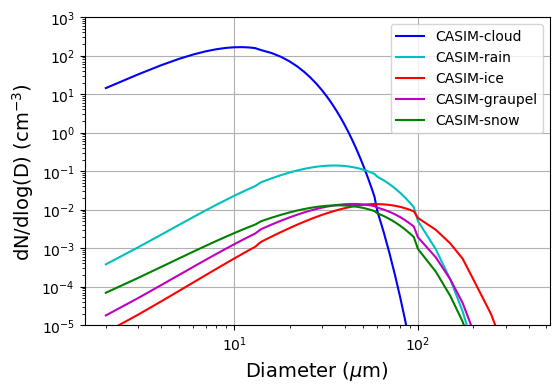

In [7]:
f, (ax) = plt.subplots(1, sharex=True,figsize=(6,4)) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid('True')
ax.set_ylabel('dN/dlog(D) (cm$^{-3}$)', fontsize=14)
ax.set_xlabel('Diameter ($\mu$m)', fontsize=14)

ax.plot(cpd_bins[:-1],((X_cloud*width)/log_width_cas)*1e-6,c='b',label='CASIM-cloud')
ax.plot(cpd_bins[:-1],((X_rain*width)/log_width_cas)*1e-6,c='c',label='CASIM-rain')
ax.plot(cpd_bins[:-1],((X_ice*width)/log_width_cas)*1e-6,c='r',label='CASIM-ice')
ax.plot(cpd_bins[:-1],((X_graupel*width)/log_width_cas)*1e-6,c='m',label='CASIM-graupel')
ax.plot(cpd_bins[:-1],((X_snow*width)/log_width_cas)*1e-6,c='g',label='CASIM-snow')

ax.set_ylim((1e-5, 1e3))

plt.legend()
plt.savefig('example_model_psd.png',dpi=300)